### Nom et Prénoms : SOSSOU Didi Orlog
### Parcours :  IA Big Data

## I- Introduction example

#### 1- Réécriture sous la forme standard en mettant la contrainte sous la forme 
$$ g(\theta) \leq 0 $$

$$
\min_{\theta_1, \theta_2} \frac{1}{2} (\theta_1^2 + \theta_2^2)
$$

#### Sc:

$$
1 - \theta_1 - \theta_2  \leq 0
$$


In [25]:
import sympy as sp

theta1, theta2, mu = sp.symbols('theta1 theta2 mu', real=True)
f = (theta1**2 + theta2**2) / 2  # Objectif
g =  1 - theta1 - theta2 # Contrainte réécrite sous la forme g(θ) ≤ 0

#Affichage
f, g

#### 2 - Le Lagrangien est donné par :

$$ L(\theta_1, \theta_2, \mu) = \frac{1}{2} (\theta_1^2 + \theta_2^2) + \mu (1 - \theta_1 - \theta_2) $$


avec

a. $$ \mu \geq 0 $$
b. $$ \mu (1 - \theta_1 - \theta_2) = 0 $$



In [26]:
# Définition du Lagrangien
L = f + mu * g

L

#### 3- Stationarité

$$
\frac{\partial L}{\partial \theta_1} = 0, \quad \frac{\partial L}{\partial \theta_2} = 0
$$


In [27]:
# Calcul des dérivées partielles
grad_L_theta1 = sp.diff(L, theta1)
grad_L_theta2 = sp.diff(L, theta2)

# Résolution du systeme
sol_theta = sp.solve([grad_L_theta1, grad_L_theta2], (theta1, theta2))

print("Solution en fonction de μ :")
sp.Eq(theta1, sol_theta[theta1]), sp.Eq(theta2, sol_theta[theta2])

Solution en fonction de μ :


#### 4- Le dual s’écrit :

$$
\max_{\mu \geq 0} \quad \min_{\theta_1, \theta_2} \mathcal{L}(\theta_1, \theta_2, \mu)
$$
avec 
$$
g(\mu) = \min_{\theta_1, \theta_2} L(\theta_1, \theta_2, \mu)
$$



In [28]:
# Substitution des solutions dans le Lagrangien
theta1_opt, theta2_opt = sol_theta[theta1], sol_theta[theta2]
L_dual = L.subs({theta1: theta1_opt, theta2: theta2_opt})

# Fonction duale
g_mu = sp.simplify(L_dual)

print("Fonction duale g(μ) :")
g_mu

Fonction duale g(μ) :


In [29]:
# Maximisation de la fonction duale
grad_g_mu = sp.diff(g_mu, mu)
mu_star = sp.solve(grad_g_mu, mu)

# Filtre les solutions admissibles (μ ≥ 0)
mu_star = [m.evalf() for m in mu_star if m >= 0]

print("Valeur optimale de μ* :",mu_star)

Valeur optimale de μ* : [0.500000000000000]


#### 5- Tracé de la fonction duale g(μ) pour illustrer son maximum.


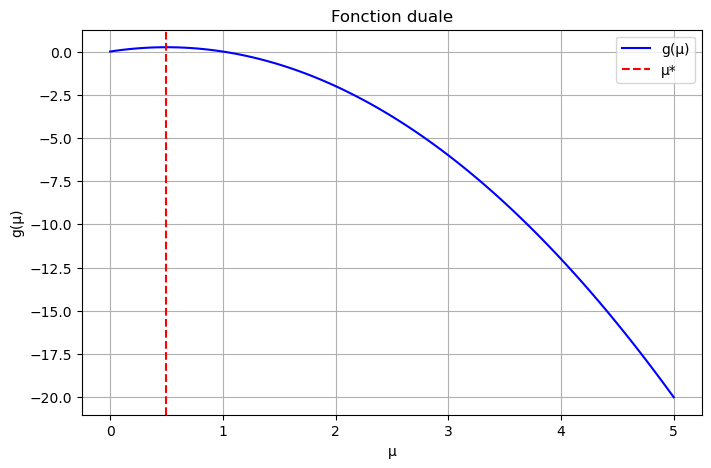

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Conversion de g(mu) en fonction numérique
g_mu_func = sp.lambdify(mu, g_mu, 'numpy')

# Domaine de mu
mu_vals = np.linspace(0, 5, 100)
g_vals = g_mu_func(mu_vals)

plt.figure(figsize=(8, 5))
plt.plot(mu_vals, g_vals, label="g(μ)", color='b')
plt.axvline(mu_star[0], color='r', linestyle='--', label="μ*")
plt.xlabel("μ")
plt.ylabel("g(μ)")
plt.legend()
plt.title("Fonction duale")
plt.grid()
plt.show()


## II- A more evolved problem

### 2.1 Mathematical derivation. . .

### 1- Forme matricielle :  
Développons la fonction objectif :  

$$
\frac{1}{2} (\theta_1 - 3)^2 + \frac{1}{2} (\theta_2 - 1)^2
= \frac{1}{2} \left( \theta_1^2 - 6\theta_1 + 9 + \theta_2^2 - 2\theta_2 + 1 \right).
$$

En regroupant les termes :

$$
\frac{1}{2} (\theta_1^2 + \theta_2^2) - 3\theta_1 - \theta_2 + 5.
$$

Or,  

$$
\|\theta - c\|_2^2 = (\theta - c)^T (\theta - c) = \theta^T \theta - 2c^T \theta + c^T c.
$$

En posant $$ c = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$$ on obtient :

$$
\frac{1}{2} \|\theta - c\|_2^2.
$$

Pour les contraintes, on réécrit :  

$$
\begin{bmatrix} 
1 & 1 \\ 
1 & -1 \\ 
-1 & 1 \\ 
-1 & -1 
\end{bmatrix}
\begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}
\leq 
\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}.
$$

On pose donc :

$$
A = \begin{bmatrix} 
1 & 1 \\ 
1 & -1 \\ 
-1 & 1 \\ 
-1 & -1 
\end{bmatrix}, \quad
b = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}.
$$

Le problème s’écrit sous la forme :

$$
\min_{\theta} \frac{1}{2} \|\theta - c\|_2^2, \quad \text{sous } A\theta - b \leq 0.
$$

---

### 2. Lagrangien


$$
\mathcal{L}(\theta, \mu) = \frac{1}{2} \|\theta - c\|_2^2 + \mu^T (A\theta - b).
$$

$$ \mu \in \mathbb{R}^4 $$ et $$ \mu \geq 0 $$

---

### 3. Condition stationnaire KKT

#### (a) Développement de la norme 

On développe :

$$
\|\theta - c\|_2^2 = (\theta - c)^T (\theta - c).
$$

$$
\|\theta - c\|_2^2 = \theta^T \theta - 2c^T \theta + c^T c.
$$

#### (b) Gradient  
- Soit $$ f(\theta) = \theta^T \theta $$

$$
D_v f(\theta) = \lim_{h \to 0} \frac{f(\theta + h v) - f(\theta)}{h}.
$$

$$
f(\theta + h v) = (\theta + h v)^T (\theta + h v) = \theta^T \theta + 2h \theta^T v + h^2 v^T v.
$$

$$
f(\theta + h v) - f(\theta) = 2h \theta^T v + h^2 v^T v.
$$

$$
\frac{f(\theta + h v) - f(\theta)}{h} = 2 \theta^T v + h v^T v.
$$

$$
\lim_{h \to 0} \frac{f(\theta + h v) - f(\theta)}{h} = 2 \theta^T v.
$$

$$
\nabla_{\theta} (\theta^T \theta) = 2\theta.
$$

- Soit $$ g(\theta) = \theta^T c $$

$$
D_v g(\theta) = \lim_{h \to 0} \frac{g(\theta + h v) - g(\theta)}{h}.
$$

$$
g(\theta + h v) = (\theta + h v)^T c = \theta^T c + h v^T c.
$$

$$
g(\theta + h v) - f(\theta) = h v^T c.
$$

$$
\frac{f(\theta + h v) - g(\theta)}{h} = v^T c.
$$

$$
\lim_{h \to 0} \frac{g(\theta + h v) - g(\theta)}{h} = v^T c.
$$

$$
\nabla_{\theta} (\theta^T c) = c.
$$



De ce qui precede, 
$$
\nabla_{\theta} (\theta^T \theta) = 2\theta.
$$
et
$$
\nabla_{\theta} (\theta^T c) = c.
$$

Ainsi,

$$
\nabla_{\theta} \|\theta - c\|_2^2 = 2(\theta - c).
$$


---

### 4. Condition stationnaire des KKT et expression de theta


$$
\nabla_{\theta} \mathcal{L} = 0.
$$


$$
\nabla_{\theta} \mathcal{L} = \nabla_{\theta} \left( \frac{1}{2} \|\theta - c\|_2^2 + \mu^T (A\theta - b) \right).
$$

En utilisant les dérivées précédentes :

$$
\nabla_{\theta} \mathcal{L} = (\theta - c) + A^T \mu = 0.
$$

On en déduit :

$$
\theta = c - A^T \mu.
$$

---

### 5. Problème dual  

En remplaçant $$ \theta = c - A^T \mu $$ dans la fonction objectif :

$$
\frac{1}{2} \|\theta - c\|_2^2 = \frac{1}{2} (c - A^T \mu - c)^T (c - A^T \mu - c).
$$

Ce qui donne :

$$
\frac{1}{2} \mu^T A A^T \mu.
$$

Le terme de contrainte devient :

$$
A\theta - b = A(c - A^T \mu) - b = Ac - A A^T \mu - b.
$$

On pose :

$$
H = A A^T, \quad q = -(Ac - b).
$$

Le problème dual est alors :

$$
\min_{\mu} \quad \frac{1}{2} \mu^T H \mu + \mu^T q
$$

sous la contrainte :

$$
\mu \geq 0.
$$




### 2.2 . . . and numerical implementation